<a href="https://colab.research.google.com/github/bianquini/HeartDisease-DataMining/blob/master/Indu%C3%A7%C3%A3o_de_Modelos_e_Avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions

from sklearn import svm




In [0]:
dataFrame = pd.read_csv('https://raw.githubusercontent.com/bianquini/HeartDisease-DataMining/master/DS%20pr%C3%A9-processado.csv',index_col=[0])
dataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp0,cp1,cp2,cp3,ca0,ca1,ca2,ca3,ca4,thal0,thal1,thal2,thal3,restecg0,restecg1,restecg2,slope0,slope1,slope2
0,63,female,3,0.481132,0.244292,True,0,0.603053,False,0.370968,0,0,1,unhealthy,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False
1,37,female,2,0.339623,0.283105,False,1,0.885496,False,0.564516,0,0,2,unhealthy,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False
2,41,male,1,0.339623,0.178082,False,0,0.770992,False,0.225806,2,0,2,unhealthy,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True
3,56,female,1,0.245283,0.251142,False,1,0.816794,False,0.129032,2,0,2,unhealthy,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True
4,57,male,0,0.245283,0.520548,False,1,0.702290,True,0.096774,2,0,2,unhealthy,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,male,0,0.433962,0.262557,False,1,0.396947,True,0.032258,1,0,3,healthy,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False
299,45,female,3,0.150943,0.315068,False,1,0.465649,False,0.193548,1,0,3,healthy,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False
300,68,female,0,0.471698,0.152968,True,1,0.534351,False,0.548387,1,2,3,healthy,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False
301,57,female,0,0.339623,0.011416,False,1,0.335878,True,0.193548,1,1,3,healthy,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False


In [0]:
X = dataFrame.drop(['target'], axis = 1)
y = dataFrame['target']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Indução de Modelos de Avaliação

## Arvore de Decisão

### Combinação 1

In [0]:
modelDTC = DecisionTreeClassifier(criterion='entropy')


modelDTC.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

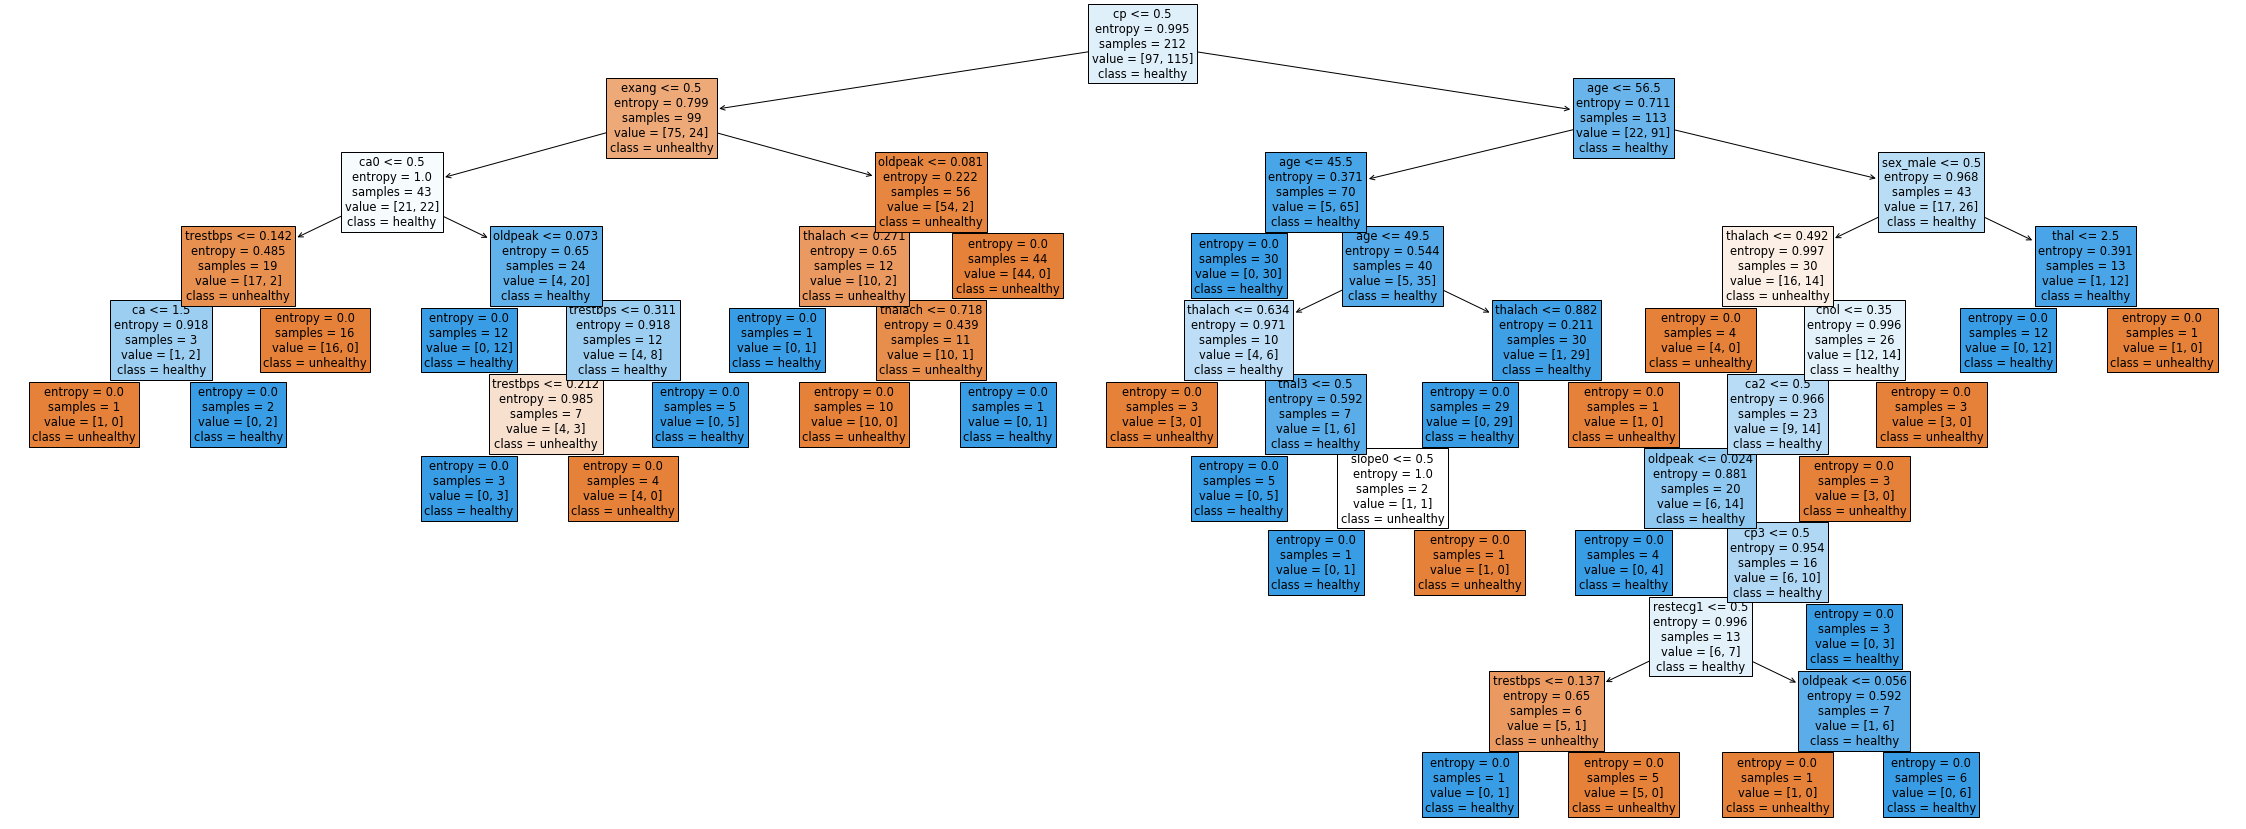

In [0]:
plt.figure(figsize=(40,15))
plot_tree(modelDTC, filled=True, class_names=y.unique(), feature_names = X.columns)
plt.show()

#### Avaliação utilizando Holdout

In [0]:
y_test_pred_DTC = modelDTC.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,30,11
observed_unhealthy,15,35


In [0]:
accuracy_score(y_test,y_test_pred_DTC)

0.7142857142857143

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_DTC = cross_val_predict(modelDTC, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,100,38
observed_unhealthy,37,128


In [0]:
accuracy_score(y,y_pred_DTC)

0.7524752475247525

### Combinação 2

In [0]:
modelDTC = DecisionTreeClassifier()

#### Avaliação utilizando Holdout

In [0]:
modelDTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_test_pred_DTC = modelDTC.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,34,7
observed_unhealthy,16,34


In [0]:
accuracy_score(y_test,y_test_pred_DTC)

0.7472527472527473

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_DTC = cross_val_predict(modelDTC, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,97,41
observed_unhealthy,39,126


In [0]:
accuracy_score(y,y_pred_DTC)

0.735973597359736

### Combinação 3

In [0]:
modelDTC = DecisionTreeClassifier(criterion='entropy', splitter='random')

#### Avaliação utilizando Holdout

In [0]:
modelDTC.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [0]:
y_test_pred_DTC = modelDTC.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,28,13
observed_unhealthy,15,35


In [0]:
accuracy_score(y_test,y_test_pred_DTC)

0.6923076923076923

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_DTC = cross_val_predict(modelDTC, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,101,37
observed_unhealthy,31,134


In [0]:
accuracy_score(y,y_pred_DTC)

0.7755775577557755

### Combinação 4

In [0]:
modelDTC = DecisionTreeClassifier(splitter='random')

#### Avaliação utilizando Holdout

In [0]:
modelDTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [0]:
y_test_pred_DTC = modelDTC.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,34,7
observed_unhealthy,18,32


In [0]:
accuracy_score(y_test,y_test_pred_DTC)

0.7252747252747253

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_DTC = cross_val_predict(modelDTC, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,103,35
observed_unhealthy,43,122


In [0]:
accuracy_score(y,y_pred_DTC)

0.7425742574257426

### Combinação 5

In [0]:
modelDTC = DecisionTreeClassifier(criterion='entropy', presort=True)

#### Avaliação utilizando Holdout

In [0]:
modelDTC.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='best')

In [0]:
y_test_pred_DTC = modelDTC.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,30,11
observed_unhealthy,16,34


In [0]:
accuracy_score(y_test,y_test_pred_DTC)

0.7032967032967034

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_DTC = cross_val_predict(modelDTC, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_DTC),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,99,39
observed_unhealthy,40,125


In [0]:
accuracy_score(y,y_pred_DTC)

0.7392739273927392

## KNN

Para o  KNN foram construidos 5 combinações diferentes para realizar a avaliação e encontrar a melhor acurácia entre elas.

Para isso os parametros testados foram:


*   n_neighbors:  1, 3, 5, 20;
*   weights: uniform, distance;
*   P: 1 - Manhatan, 2 - Euclidiana

### Combinação 1

In [0]:
modelKNN = KNeighborsClassifier(n_neighbors=1)

#### Avaliação utilizando holdout

In [0]:
modelKNN.fit(X_train,y_train)

y_test_pred_KNN = modelKNN.predict(X_test)


In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,35,6
observed_unhealthy,14,36


In [0]:
accuracy_score(y_test,y_test_pred_KNN)

0.7802197802197802

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_KNN = cross_val_predict(modelKNN, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,104,34
observed_unhealthy,32,133


In [0]:
accuracy_score(y,y_pred_KNN)

0.7821782178217822

### Combinação 2

In [0]:
modelKNN = KNeighborsClassifier(n_neighbors=3)

#### Avaliação utilizando holdout

In [0]:
modelKNN.fit(X_train,y_train)

y_test_pred_KNN = modelKNN.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,30,11
observed_unhealthy,14,36


In [0]:
accuracy_score(y_test,y_test_pred_KNN)

0.7252747252747253

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_KNN = cross_val_predict(modelKNN, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,97,41
observed_unhealthy,27,138


In [0]:
accuracy_score(y,y_pred_KNN)

0.7755775577557755

### Combinação 3

In [0]:
modelKNN = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)

#### Avaliação utilizando holdout

In [0]:
modelKNN.fit(X_train,y_train)

y_test_pred_KNN = modelKNN.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,31,10
observed_unhealthy,8,42


In [0]:
accuracy_score(y_test,y_test_pred_KNN)

0.8021978021978022

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_KNN = cross_val_predict(modelKNN, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,107,31
observed_unhealthy,27,138


In [0]:
accuracy_score(y,y_pred_KNN)

0.8085808580858086

### Combinação 4

In [0]:
modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1)


#### Avaliação utilizando holdout

In [0]:
modelKNN.fit(X_train,y_train)

y_test_pred_KNN = modelKNN.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,32,9
observed_unhealthy,7,43


In [0]:
accuracy_score(y_test,y_test_pred_KNN)

0.8241758241758241

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_KNN = cross_val_predict(modelKNN, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,104,34
observed_unhealthy,24,141


In [0]:
accuracy_score(y,y_pred_KNN)

0.8085808580858086

### Combinação 5

In [0]:
modelKNN = KNeighborsClassifier(n_neighbors=20, weights='distance', p=1)

#### Avaliação utilizando holdout

In [0]:
modelKNN.fit(X_train,y_train)

y_test_pred_KNN = modelKNN.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,33,8
observed_unhealthy,9,41


In [0]:
accuracy_score(y_test,y_test_pred_KNN)

0.8131868131868132

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_KNN = cross_val_predict(modelKNN, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_KNN),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,109,29
observed_unhealthy,17,148


In [0]:
accuracy_score(y,y_pred_KNN)

0.8481848184818482

### Resumo Avaliação KNN

Conforme analisado nas combinções acima, pode-se concluir que a *quinta combinação* com um n_neighbors = 20  tivemos  uma maior acuracia, tomando como base o modelo de avaliação *10-folds cross-validation*. Também pode-se concluir que entre as combinações acima o calculo de distancia que otimizou a predição foi a *Distancia Manhatan* utilizando pesos ponderados para a avaliação de vizinhos mais próximos.

## SVM

Para o SVM foram construidos 6 combinações diferentes para realizar a avaliação e encontrar a melhor acurácia entre elas.

Para isso os parametros testados foram:


*   Kernel:  linear,polynomial e rbf;
*   degree: grau do polinomio quando utilizado o kernel linear;
*   C: parametro multiplicador para o erro;



### Combinação 1

In [0]:
modelSVM = svm.SVC(kernel='linear')

#### Avaliação utilziando holdout

In [0]:
modelSVM.fit(X_train,y_train)

y_test_pred_SVM = modelSVM.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,32,9
observed_unhealthy,7,43


In [0]:
accuracy_score(y_test, y_test_pred_SVM)

0.8241758241758241

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_SVM = cross_val_predict(modelSVM, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,109,29
observed_unhealthy,15,150


In [0]:
accuracy_score(y, y_pred_SVM)

0.8547854785478548

### Combinação 2

In [0]:
modelSVM = svm.SVC(kernel='poly')

#### Avaliação utilizando holdout

In [0]:
modelSVM.fit(X_train,y_train)

y_test_pred_SVM = modelSVM.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,predicted_healthy,predicted_unhealthy
observed_healthy,29,12
observed_unhealthy,12,38


In [0]:
accuracy_score(y_test, y_test_pred_SVM)

0.7362637362637363

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_SVM = cross_val_predict(modelSVM, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

,predicted_healthy,predicted_unhealthy
observed_healthy,108,30
observed_unhealthy,29,136


In [0]:
accuracy_score(y, y_pred_SVM)

0.8052805280528053

### Combinação 3

In [0]:
modelSVM = svm.SVC(kernel='poly', degree=2)

#### Avaliação utilizando holdout

In [0]:
modelSVM.fit(X_train,y_train)

y_test_pred_SVM = modelSVM.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,predicted_healthy,predicted_unhealthy
observed_healthy,32,9
observed_unhealthy,9,41


In [0]:
accuracy_score(y_test, y_test_pred_SVM)

0.8021978021978022

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_SVM = cross_val_predict(modelSVM, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

,predicted_healthy,predicted_unhealthy
observed_healthy,108,30
observed_unhealthy,21,144


In [0]:
accuracy_score(y, y_pred_SVM)

0.8316831683168316

### Combinação 4

In [0]:
modelSVM = svm.SVC()

#### Avaliação utilizando holdout

In [0]:
modelSVM.fit(X_train,y_train)

y_test_pred_SVM = modelSVM.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,predicted_healthy,predicted_unhealthy
observed_healthy,33,8
observed_unhealthy,14,36


In [0]:
accuracy_score(y_test, y_test_pred_SVM)

0.7582417582417582

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_SVM = cross_val_predict(modelSVM, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

,predicted_healthy,predicted_unhealthy
observed_healthy,103,35
observed_unhealthy,19,146


In [0]:
accuracy_score(y, y_pred_SVM)

0.8217821782178217

### Combinação 5

In [0]:
modelSVM = svm.SVC(kernel='linear', C=5)

#### Avaliação utilizando holdout

In [0]:
modelSVM.fit(X_train,y_train)

y_test_pred_SVM = modelSVM.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,31,10
observed_unhealthy,7,43


In [0]:
accuracy_score(y_test, y_test_pred_SVM)

0.8131868131868132

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_SVM = cross_val_predict(modelSVM, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

,predicted_healthy,predicted_unhealthy
observed_healthy,105,33
observed_unhealthy,25,140


In [0]:
accuracy_score(y, y_pred_SVM)

0.8085808580858086

### Combinação 6

In [0]:
modelSVM = svm.SVC(C=5)

#### Avaliação utilizando holdout

In [0]:
modelSVM.fit(X_train,y_train)

y_test_pred_SVM = modelSVM.predict(X_test)

pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,predicted_healthy,predicted_unhealthy
observed_healthy,35,6
observed_unhealthy,12,38


In [0]:
accuracy_score(y_test, y_test_pred_SVM)

0.8021978021978022

#### Avaliação utilizando 10-folds cross-validation

In [0]:
y_pred_SVM = cross_val_predict(modelSVM, X, y, cv=10)

pd.DataFrame( 
    confusion_matrix(y, y_pred_SVM),
    index = ['observed_healthy','observed_unhealthy'],
    columns = ['predicted_healthy','predicted_unhealthy']
    )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

,predicted_healthy,predicted_unhealthy
observed_healthy,110,28
observed_unhealthy,23,142


In [0]:
accuracy_score(y, y_pred_SVM)

0.8316831683168316

### Resumo Avaliação SVM

Conforme avaliado nas combinações acima, para este conjunto de dados, a combinação de SVM que apresentou um melhor resultado foi a *primeira combinação*, onde conseguiu-se uma acuracia de 85% aproximadamente, tomando como base o modelo de avaliação *10-folds cross-validation*. Na combinação citada foi utilizado o *Kernel Linear* sem valor definido para o parametro *C*.
